What is total amount of damages due to missed pickups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
trash_pickups = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')

In [3]:
trash_pickups.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


In [4]:
trash_pickups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
 11  LONGITUDE         20198 non-null  float64
 12  LATITUDE          20198 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.0+ MB


In [5]:
red_river_pickups = trash_pickups[trash_pickups['Trash Hauler'] == 'RED RIVER']
red_river_pickups.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
5,25317,11/1/2017,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211.0,RED RIVER,4304,16.0,1751660.164,643215.2011,-86.733980,36.098140


In [6]:
red_river_pickups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14395 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    14395 non-null  int64  
 1   Date Opened       14395 non-null  object 
 2   Request           14395 non-null  object 
 3   Description       14376 non-null  object 
 4   Incident Address  14394 non-null  object 
 5   Zip Code          14361 non-null  float64
 6   Trash Hauler      14395 non-null  object 
 7   Trash Route       14393 non-null  object 
 8   Council District  14379 non-null  float64
 9   State Plan X      14390 non-null  float64
 10  State Plan Y      14390 non-null  float64
 11  LONGITUDE         14390 non-null  float64
 12  LATITUDE          14390 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
misses = red_river_pickups[red_river_pickups['Request'].str.contains('Missed', na=False)]
misses.head(10)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
8,25330,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1794533.514,618749.3427,-86.588364,36.031728
10,25341,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218.0,RED RIVER,4204,2.0,1721577.768,676018.3999,-86.836750,36.187584
14,25370,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,6543 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1706941.584,659614.1836,-86.885842,36.142170
15,25371,11/1/2017,Trash - Curbside/Alley Missed Pickup,Pickup missed,2218 BUENA VISTA PIKE,37218.0,RED RIVER,4204,2.0,1724505.766,679777.5997,-86.826936,36.197979
18,25449,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss for this address and others. T...,356 Kingview Dr,37218.0,RED RIVER,3204,1.0,1722025.958,685779.0712,-86.835514,36.214406
19,25454,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,449 Westboro Dr,37209.0,RED RIVER,4201,20.0,1710615.090,661992.3307,-86.873474,36.148793
21,25469,11/1/2017,Trash - Curbside/Alley Missed Pickup,"Our trash was not picked up today, Wed, Nov 1....",117 Lafayette Ct,37205.0,RED RIVER,1302,23.0,1713464.967,644882.4020,-86.863310,36.101863


In [8]:
grouped_address = misses.groupby('Incident Address')['Incident Address'].value_counts().reset_index(name='count')
grouped_address.head(10)

,Incident Address,count
0,"100 Bluefield Square, Nashville, TN 37214, Uni...",1
1,100 Braxton Hill Ct,1
2,100 Brook Hollow Rd,1
3,"100 Clydelan Ct, Nashville, TN 37205, United S...",2
4,"100 Desoto Dr, Nashville, TN 37210, United States",1
5,"100 Dyer Ct, Nashville, TN 37218, United States",1
6,"100 Graeme Dr, Nashville, TN 37214, United States",1
7,"100 Iroquois Ct, Nashville, TN 37205, United S...",1
8,"100 Lincoln Ct, Nashville, TN 37205, United St...",2
9,"100 Nashboro Greens, Nashville, TN 37217, Unit...",2


In [9]:
grouped_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Incident Address  8190 non-null   object
 1   count             8190 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.1+ KB


In [10]:
multiple_misses = grouped_address[grouped_address['count'] >=2]
multiple_misses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1551 entries, 3 to 8173
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Incident Address  1551 non-null   object
 1   count             1551 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.4+ KB


In [11]:
multiple_misses['running_total'] = multiple_misses['count'].cumsum()

/var/folders/9h/g0rkqfv512jfzf83x03ycm1c0000gn/T/ipykernel_24777/2432700330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_misses['running_total'] = multiple_misses['count'].cumsum()


In [12]:
multiple_misses.reset_index()

,index,Incident Address,count,running_total
0,3,"100 Clydelan Ct, Nashville, TN 37205, United S...",2,2
1,8,"100 Lincoln Ct, Nashville, TN 37205, United St...",2,4
2,9,"100 Nashboro Greens, Nashville, TN 37217, Unit...",2,6
3,12,"100 Rhine Dr, Nashville, TN 37115, United States",2,8
4,21,"1000 Flintlock Ct, Nashville, TN 37217, United...",2,10
...,...,...,...,...
1546,8148,946 Youngs Ln,2,4067
1547,8149,"947 Glendale Ln, Nashville, TN 37204, United S...",2,4069
1548,8162,"960 44th Ave N, Nashville, TN 37209, United St...",2,4071
1549,8169,"971 Windrowe Dr, Nashville, TN 37205, United S...",2,4073


In [13]:
4075 - 1551 #subtracting the number of entries because the first incident is not fined. 

2524

In [14]:
2524*200 #multiplying by 200 because that is the fine per infraction. 

504800

In [15]:
# $504800 is the total amount owed 

To check - I will do a running total of all incidences of red river pickups and multiply that by the fine. Then I will see the percentages of houses that have had multiple issues against the total number of houses and reduce that by the amount I have found. 

In [16]:
grouped_address['running_total'] = grouped_address['count'].cumsum()

In [17]:
grouped_address

,Incident Address,count,running_total
0,"100 Bluefield Square, Nashville, TN 37214, Uni...",1,1
1,100 Braxton Hill Ct,1,2
2,100 Brook Hollow Rd,1,3
3,"100 Clydelan Ct, Nashville, TN 37205, United S...",2,5
4,"100 Desoto Dr, Nashville, TN 37210, United States",1,6
...,...,...,...
8185,"Old Tusculum Rd, Antioch, Tennessee, 37013",1,10710
8186,"Queens Ln, Nashville, TN 37218, United States",1,10711
8187,Robin Springs Rd,1,10712
8188,"Trevino Pl, Nashville, TN 37013, United States",1,10713


In [18]:
10714*200 #Total number of incidences multiplied by the fee amount.

2142800

In [19]:
#1551 houses that have had muliple misses. 8190 total houses that have had at least one miss. 

In [20]:
1551 / 8190

0.18937728937728937

In [21]:
0.18937728937728937*2142800

405797.65567765565

In [22]:
2142800 - 405797.65567765565

1737002.3443223443

In [23]:
grouped_address_2 = trash_pickups.groupby('Incident Address')['Incident Address'].value_counts().reset_index(name='count')
grouped_address_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14121 entries, 0 to 14120
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Incident Address  14121 non-null  object
 1   count             14121 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 220.8+ KB


In [24]:
grouped_address_2

,Incident Address,count
0,", Nashville, TN , United States",1
1,1 BELLE FORREST AVE C,1
2,10 Belle Forrest Ave,1
3,"100 Bluefield Square, Nashville, TN 37214, Uni...",1
4,100 Braxton Hill Ct,1
...,...,...
14116,compton ave & 15th ave s,1
14117,fransworth dr,1
14118,s 13th st & woodland st,1
14119,trimble rd & lindawood dr,1


In [25]:
1551 / 14121

0.10983641385171022

In [26]:
2142800 * 0.10983641385171022

235357.46760144466

In [27]:
2142800-235357

1907443

What other types of complaints are there?

In [28]:
requests = trash_pickups.groupby('Request')['Request'].value_counts()

In [29]:
requests.head()

Request
Damage to Property                        257
Trash - Backdoor                         2629
Trash - Curbside/Alley Missed Pickup    15028
Trash Collection Complaint               2312
Name: count, dtype: int64

Are there any geospatial analysis you can do?  Which visualizations can you create?

In [30]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [31]:
trash_geo = gpd.GeoDataFrame(trash_pickups, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(trash_pickups.LONGITUDE, trash_pickups.LATITUDE))

In [32]:
type(trash_geo)

geopandas.geodataframe.GeoDataFrame

In [33]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [34]:
picks_zips = gpd.sjoin(trash_geo, zipcodes, predicate = 'within')

In [35]:
picks_zips.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,geometry,index_right,zip,po_name
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,POINT (-86.81539 36.21729),42,37207,NASHVILLE
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,POINT (-86.83810 36.21347),27,37218,NASHVILLE
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,POINT (-86.88556 36.14292),12,37209,NASHVILLE
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,POINT (-86.78917 36.21265),42,37207,NASHVILLE
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,POINT (-86.87499 36.15486),12,37209,NASHVILLE


In [36]:
inc_by_zip = picks_zips['zip'].value_counts()

In [37]:
inc_by_zip

zip
37013    2280
37211    2240
37205    1492
37209    1413
37215    1402
37207    1302
37115    1270
37206    1218
37208    1042
37214    1005
37218     983
37216     841
37217     836
37204     639
37212     601
37210     554
37203     393
37220     299
37027     168
37189      60
37221      48
37219      43
37201      35
37076       5
37138       5
37086       3
37213       1
37228       1
Name: count, dtype: int64

In [39]:
incs_in_37013 = picks_zips.loc[picks_zips['zip'] == '37013']
incs_in_37013.shape

(2280, 17)

In [40]:
polygon37013 = zipcodes.loc[zipcodes['zip'] == '37013']
polygon37013.shape

(1, 3)

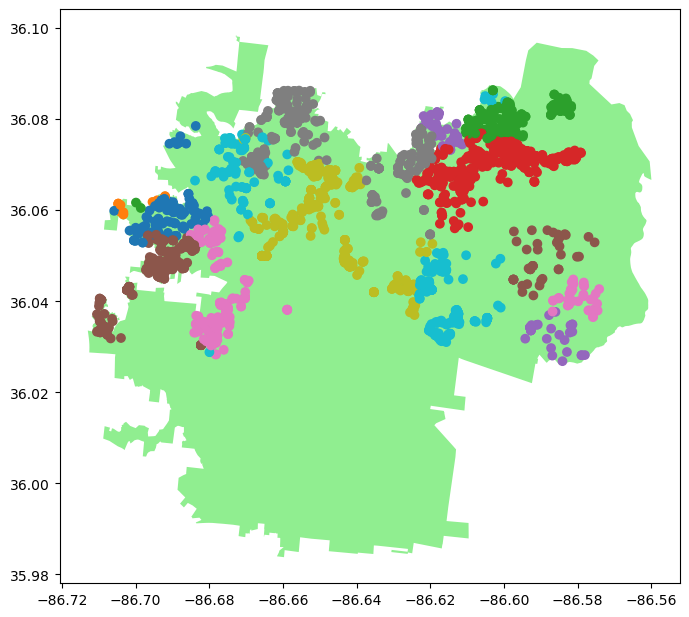

In [41]:
ax = polygon37013.plot(figsize = (8, 10), color = 'lightgreen')
incs_in_37013.plot( ax = ax, column = 'Trash Route');
plt.show();

In [42]:
polygon37013.geometry.centroid

/var/folders/9h/g0rkqfv512jfzf83x03ycm1c0000gn/T/ipykernel_24777/3672746340.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37013.geometry.centroid


51    POINT (-86.63636 36.04177)
dtype: geometry

In [44]:
center = polygon37013.geometry.centroid[51]
print(center)

POINT (-86.63635924054336 36.04176675016873)


/var/folders/9h/g0rkqfv512jfzf83x03ycm1c0000gn/T/ipykernel_24777/2641159599.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37013.geometry.centroid[51]


In [45]:
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.04176675016873, -86.63635924054336]


In [46]:
map_37013 = folium.Map(location =  area_center, zoom_start = 12)
map_37013

In [47]:
i = 0
for row_index, row_values in incs_in_37013.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 8
values are:
 
Request Number                                     25330
Date Opened                                    11/1/2017
Request             Trash - Curbside/Alley Missed Pickup
Description                                      Missed.
Incident Address           4484 Lavergne Couchville Pike
Zip Code                                         37013.0
Trash Hauler                                   RED RIVER
Trash Route                                         4210
Council District                                    33.0
State Plan X                                 1794533.514
State Plan Y                                 618749.3427
LONGITUDE                                     -86.588364
LATITUDE                                       36.031728
geometry                POINT (-86.58836424 36.03172793)
index_right                                           51
zip                                                37013
po_name                                          ANTIOCH
Name: 

In [49]:

map_37013 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37013).add_to(map_37013)



for row_index, row_values in incs_in_37013.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = str(row_values['Trash Route'])
    icon=folium.Icon(color="blue",icon="trash", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37013)
map_37013.save('../maps/map37013.html')

#display our map
map_37013